# Introduction to AI: Final Project
# Question 1, Part 1

In [1]:
import keras
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [2]:
from keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# reshape datat to fit CNN model
x_train = x_train.reshape(60000,28,28,1)
x_test = x_test.reshape(10000,28,28,1)

from keras.utils import to_categorical
# one hot encode y
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

11493376/11490434 [==============================] - 0s 0us/step


In [0]:
#hyper_parameters
batch_size = 128
epochs = 12

In [0]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, MaxPooling2D, Dropout

In [5]:
model = Sequential()

# Stage 1
model.add(Conv2D(20, 
                 kernel_size=(5,5), 
                 strides=1, 
                 padding='valid', 
                 activation='relu', 
                 input_shape=(28,28,1)))

model.add(MaxPooling2D(pool_size=(2,2), 
                       strides=(2,2), 
                       padding='valid'))
#model.add(Dropout(0.25))

# Stage 2
model.add(Conv2D(50, 
                 kernel_size=(5,5), 
                 strides=1, 
                 padding='valid', 
                 activation='relu'))

model.add(MaxPooling2D(pool_size=(2,2), 
                       strides=(2,2), 
                       padding='valid'))
model.add(Dropout(0.45))

# Stage 3
model.add(Flatten())
model.add(Dense(500, 
                activation='relu'))
model.add(Dropout(0.25))

# Stage 4
model.add(Dense(10, 
                activation='softmax'))






Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [6]:

model.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

In [7]:
from keras.callbacks import ReduceLROnPlateau

reduce_lr = ReduceLROnPlateau(monitor='loss', factor=0.2, patience=5, min_lr=0.0000001)
# hyper_parameters used: batch_size, epochs
history = model.fit(x_train, 
          y_train, 
          validation_data=(x_test, y_test),
          callbacks=[reduce_lr],
          batch_size=batch_size, 
          epochs=epochs)


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 60000 samples, validate on 10000 samples
Epoch 1/12





60000/60000 [==============================] - 14s 239us/step - loss: 3.0673 - acc: 0.7511 - val_loss: 0.0959 - val_acc: 0.9697
Epoch 2/12
60000/60000 [==============================] - 6s 96us/step - loss: 0.1692 - acc: 0.9494 - val_loss: 0.0611 - val_acc: 0.9804
Epoch 3/12
60000/60000 [==============================] - 6s 98us/step - loss: 0.1143 - acc: 0.9661 - val_loss: 0.0433 - val_acc: 0.9855
Epoch 4/12
60000/60000 [==============================] - 6s 98us/step - loss: 0.0865 - acc: 0.9739 - val_loss: 0.0380 - val_acc: 0.9878
Epoch 5/12
60000/60000 [==============================] - 6s 98us/step - loss: 0.0744 - acc: 0.9776 - val_loss: 0.0336 - val_acc: 0.9884
Epoch 6/12
60000/60000 [==============================] - 6s 98us/step - loss: 0.0687 - acc: 0.9790 - val_loss: 0.0280 - val_acc: 0.9909
Epoch 7/12
60000/60000 [

In [8]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.02470423975045196
Test accuracy: 0.9918


In [10]:
model.save("model_9918.h5")
print("Saved model to disk")

Saved model to disk


In [11]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 24, 24, 20)        520       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 20)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 8, 8, 50)          25050     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 4, 4, 50)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 4, 4, 50)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 800)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 500)              

In [0]:
train_loss = history.history['loss']
val_loss   = history.history['val_loss']
train_acc  = history.history['acc']
val_acc    = history.history['val_acc']

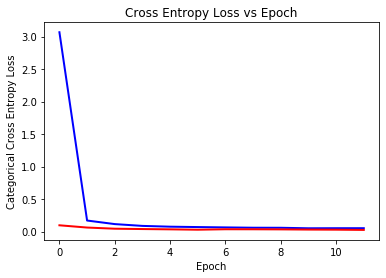

In [18]:
# Plot loss
fig = plt.figure()
plt.plot(train_loss, color='blue', linewidth=2)
plt.plot(val_loss, color='red', linewidth=2)
plt.title("Cross Entropy Loss vs Epoch")
plt.ylabel("Categorical Cross Entropy Loss")
plt.xlabel("Epoch")
plt.show()

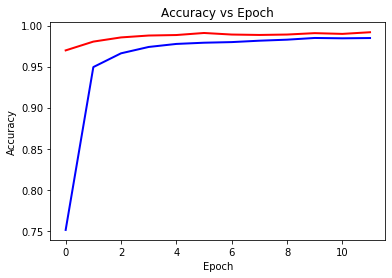

In [19]:
# Plot accuracy
fig = plt.figure()
plt.plot(train_acc, color='blue', linewidth=2)
plt.plot(val_acc, color='red', linewidth=2)
plt.title("Accuracy vs Epoch")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.show()